In [5]:
#imports
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps

import matplotlib.pyplot as plt

In [10]:
%reload_ext autoreload
%autoreload 2

from our_package import * #allows us to use our functions directly

In [72]:
#we call the different functions
T = 5
Lambda = 1

D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T, a, b)
Y = Computation_Y(T, Lambda)
x,x_tilde = ComputeArgmax(T,Lambda, Y)
mu,mu_tilde = ComputeMeans(T,Lambda, Y)
q1 = ComputeQuantiles(T,Lambda,0.975*np.ones(T), Y)
q2 = ComputeQuantiles(T,Lambda,0.025*np.ones(T), Y)
med = ComputeQuantiles(T,Lambda,0.5*np.ones(T), Y)
sim_theta,sim_theta_tilde = MetropolisHastings(T,Lambda, Y)
Mean=np.sum(sim_theta,axis=0)/sim_theta.shape[0]
q = np.array([2.5,50,97.5])
quantiles_emp = Quantiles(sim_theta_tilde, q,T)

In [ ]:
#convergence of the acceptance rate
fig, ax = plt.subplot(111)


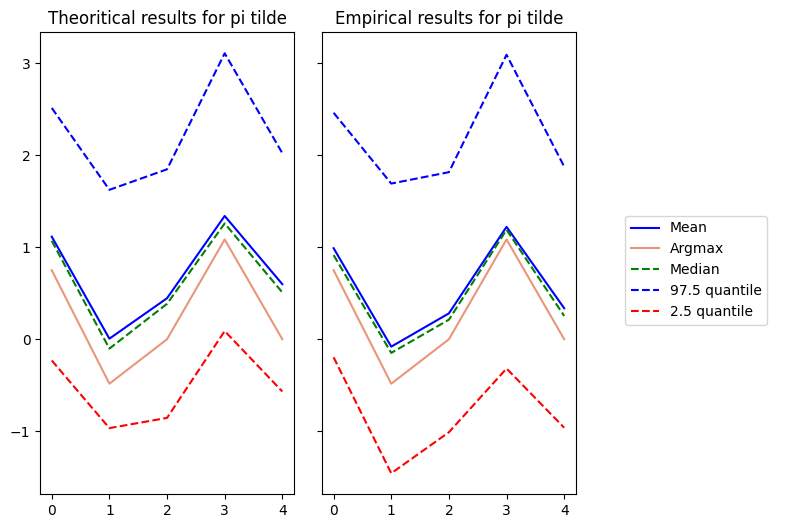

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 6), sharey=True)
#Plot of theoritical results
axes[0].plot(mu_tilde,color="blue",label="Mean")
axes[0].plot(x_tilde,color="darksalmon",label="Argmax")
axes[0].plot(med,'g--',label="Median")
axes[0].plot(q1,'b--',label="97.5 quantile")
axes[0].plot(q2,'r--',label="2.5 quantile")
axes[0].set_title("Theoritical results for pi tilde")


#Plot of empirical results
axes[1].plot(D@Mean,color="blue")
axes[1].plot(x_tilde,color="darksalmon")
axes[1].plot(quantiles_emp[1],'g--')
axes[1].plot(quantiles_emp[2],'b--')
axes[1].plot(quantiles_emp[0],'r--')
axes[1].set_title("Empirical results for pi tilde")

# Shrink current axis by 20%
box0,box1 = axes[0].get_position(),axes[1].get_position()
axes[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
axes[1].set_position([box1.x0*0.8, box1.y0, box1.width * 0.8, box1.height])
fig.legend(loc=(0.8*box1.x0+box1.width,box1.height/2))
plt.show()

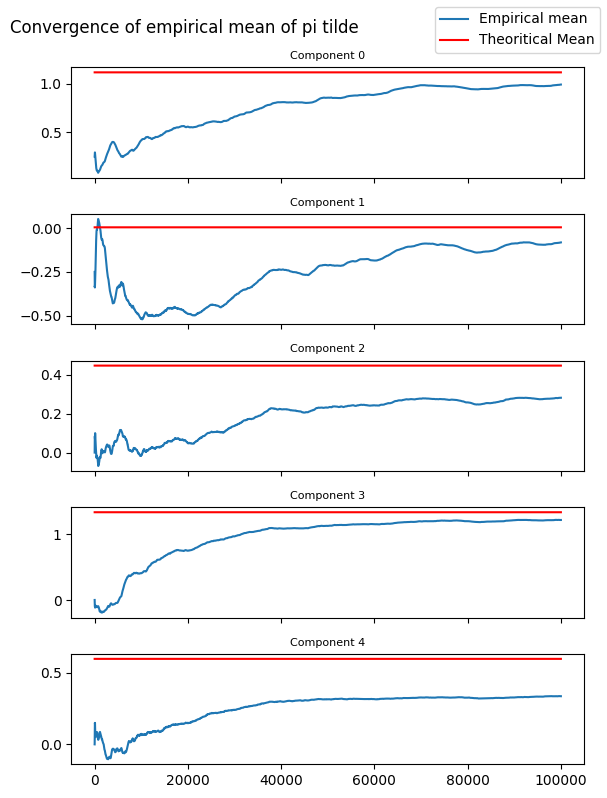

In [68]:
#Convergence plot of the mean of theta_tilde
nb_iter=sim_theta.shape[0]
x=np.linspace(1,nb_iter,nb_iter)
mean_tab=np.cumsum(sim_theta_tilde,axis=0)

fig,Axes = plt.subplots(T,1,figsize=(6,8),sharex=True)
for i in range(T):
    ax = Axes[i]
    res=mean_tab[:,i]/x
    ax.plot(x,res,label="Empirical mean" if i==0 else "")
    ax.plot(x,mu_tilde[i]*np.ones(nb_iter),'r',label="Theoritical Mean" if i==0 else "")
    ax.set_title(f"Component {i}",fontsize=8)

fig.suptitle("Convergence of empirical mean of pi tilde", x=0.3)
fig.tight_layout()
fig.legend()
plt.show()